In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

In [3]:
t = np.arange(0,1000)
x = np.sin(0.1*t)+np.random.rand(1000)*2

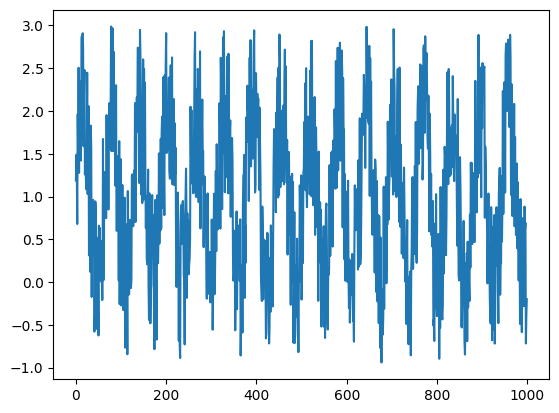

In [4]:
plt.plot(x)

In [5]:
train,test = x[0:800],x[800:]

In [6]:
def convert_data(data,step):
  X,Y = [],[]
  for i in range(len(data)-step):
    d=i+step
    X.append(data[i:d,])
    Y.append(data[d,])
  return np.array(X),np.array(Y)

In [7]:
def convert_data_extra(data,x_step,y_step):
  X,Y = [],[]
  for i in range(len(data)-x_step-y_step+1):
    d=i+x_step
    X.append(data[i:d])
    Y.append(data[d:d+y_step])
  return np.array(X),np.array(Y)

In [8]:
x_step = 10
y_step = 1
trainX,trainY=convert_data_extra(train,x_step,y_step)
testX,testY=convert_data_extra(test,x_step,y_step)

In [9]:
trainX.shape,testX.shape,trainY.shape,testY.shape

((790, 10), (190, 10), (790, 1), (190, 1))

In [11]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [12]:
trainX.shape,testX.shape

((790, 10, 1), (190, 10, 1))

In [14]:
model = Sequential()
model.add(SimpleRNN(units=64,activation='tanh',input_shape=(10,1), return_sequences=True))
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, 10, 64)            4224      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 12,545
Trainable params: 12,545
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(trainX,trainY,epochs=100,batch_size=16,validation_data=(testX,testY))

Epoch 1/100
50/50 [==============================] - 3s 21ms/step - loss: 0.5884 - val_loss: 0.5613
Epoch 2/100
50/50 [==============================] - 1s 11ms/step - loss: 0.5052 - val_loss: 0.4628
Epoch 3/100
50/50 [==============================] - 0s 8ms/step - loss: 0.4782 - val_loss: 0.5317
Epoch 4/100
50/50 [==============================] - 0s 8ms/step - loss: 0.4475 - val_loss: 0.4253
Epoch 5/100
50/50 [==============================] - 0s 8ms/step - loss: 0.4398 - val_loss: 0.4560
Epoch 6/100
50/50 [==============================] - 0s 9ms/step - loss: 0.4260 - val_loss: 0.4529
Epoch 7/100
50/50 [==============================] - 0s 8ms/step - loss: 0.4201 - val_loss: 0.4587
Epoch 8/100
50/50 [==============================] - 0s 8ms/step - loss: 0.4006 - val_loss: 0.4689
Epoch 9/100
50/50 [==============================] - 1s 11ms/step - loss: 0.3986 - val_loss: 0.4504
Epoch 10/100
50/50 [==============================] - 0s 10ms/step - loss: 0.3981 - val_loss: 0.4284
Epoch

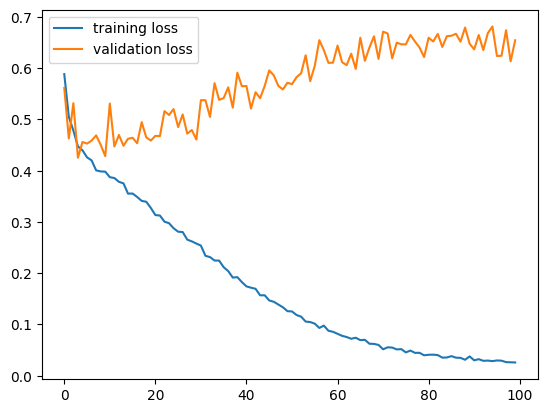

In [17]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(loss,label='training loss')
plt.plot(val_loss,label='validation loss')
plt.legend()

In [18]:
score=model.evaluate(trainX,trainY)
score

25/25 [==============================] - 0s 4ms/step - loss: 0.0271


0.02713831700384617

In [19]:
train_preds=model.predict(trainX)
test_preds=model.predict(testX)
preds=np.concatenate((train_preds,test_preds),axis=0)

6/6 [==============================] - 0s 4ms/step


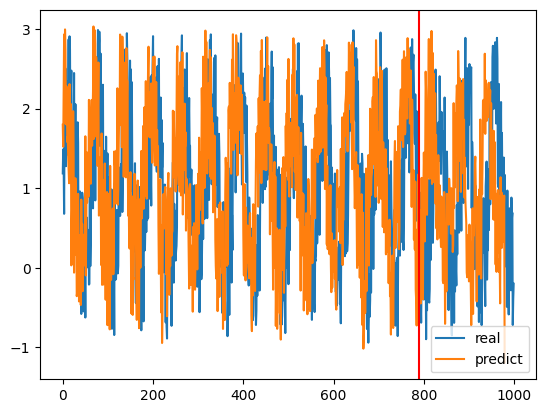

In [20]:
plt.plot(x,label='real')
plt.plot(preds,label='predict')
plt.legend()
plt.axvline(len(trainX),c='r')
